### Pymaceuticals Skill Drill - Day 1

Congratulations, you are hired by Pymaceuticals Inc., one of the leading imaginary pharmaceutical companies that specializes in anti-cancer pharmaceuticals, to assist their senior scientist team in the effort to begin screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the senior scientist team to generate an initial drug regimens comparison and generate a summary of your findings. 

For this skill drill, you will walk through the steps of a basic analysis and visualize our dataset using a new type of visualization - a box and whisker plot. Although we have provided all of the steps required to produce each output, there may be some new concepts and/or terminology in this skill drill you may not have seen before. If you are ever stuck or confused, try googling some of the terms or check out the resource links we provide throughout the activity. You got this!

### Data Cleaning 

In [1]:
%matplotlib notebook

In [2]:
# Import dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [3]:
# Read the mouse data and the study results
mouse_file = os.path.join("..","Resources","Mouse_metadata.csv")
study_file = os.path.join("..","Resources","Study_results.csv")

mouse_read = pd.read_csv(mouse_file)
read_study = pd.read_csv(study_file)



In [4]:
# Display the mouse data
mouse_read.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# Display the study data
read_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [33]:
# Combine the data into a single dataset and display it
mouse_study_data = pd.merge(mouse_read, read_study, how="left")
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"])
duplicates = mouse_study_data[duplicate_mice]["Mouse ID"].index
duplicate_mouse_id = mouse_study_data.iloc[duplicates]["Mouse ID"].unique()

#alternatively
#duplicate_mouse_id = mouse_study_data[duplicate_mice]["Mouse ID"].unique()

duplicate_mouse_id


array(['g989'], dtype=object)

In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_data = mouse_study_data[mouse_study_data["Mouse ID"] == "g989"]
duplicate_index = duplicate_id_data.index
duplicate_index

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID and display it
clean_mouse_study = mouse_study_data.drop(index=list(duplicate_index))
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Generating the Boxplot

In [61]:
# Determine the final timepoint for each mouse.

# Start by getting the greatest timepoint for each mouse
greatest_tp = clean_mouse_study.groupby(["Mouse ID"])["Timepoint"].max()
greatest_tp

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [62]:
# Join the newly created `.max()` dataframe to the dataframe from Part 1
joint_data = pd.merge(greatest_tp, clean_mouse_study, how="left", on=["Mouse ID", "Timepoint"])
joint_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [70]:
# Create a list with all 10 drug regimens.
listss = joint_data["Drug Regimen"].unique()

drug_regimens_list = list(listss)
drug_regimens_list

# Create a empty list to fill with the tumor vol data
tumor_data = list()


# Isolate (filter) each mice on each drug to collect their tumor volume.
for drug in drug_regimens_list:

    # Locate the rows which match the drug and get the final tumor volumes of all mice
    tumor_vol_final = joint_data.loc[joint_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Append the outcome to the empty list previously created.
    tumor_data.append(tumor_vol_final)

In [73]:
drug_regimens_list

['Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ramicane',
 'Ketapril',
 'Propriva',
 'Naftisol',
 'Capomulin']

In [71]:
tumor_data

[0      67.973419
 1      65.525743
 11     57.031862
 13     66.083066
 27     72.226731
 31     36.321346
 41     60.969711
 50     62.435404
 56     60.918767
 78     67.289621
 97     66.196912
 101    62.117279
 123    47.010364
 129    60.165180
 141    55.629428
 142    45.699331
 153    54.656549
 170    55.650681
 197    46.250112
 200    54.048608
 202    51.542431
 211    50.005138
 216    58.268442
 233    67.685569
 245    62.754451
 Name: Tumor Volume (mm3), dtype: float64,
 2      70.717621
 17     72.255963
 29     65.815165
 36     69.042841
 38     69.823146
 48     73.212939
 79     47.520632
 82     53.303185
 86     52.942902
 114    45.000000
 131    58.011146
 135    62.030594
 140    73.059454
 156    53.713158
 160    66.096475
 167    50.218605
 172    64.119142
 173    49.000125
 185    63.423695
 187    56.527952
 198    50.649038
 205    52.614689
 210    68.134288
 230    58.634971
 236    66.842635
 Name: Tumor Volume (mm3), dtype: float64,
 3      62.999

<IPython.core.display.Javascript object>


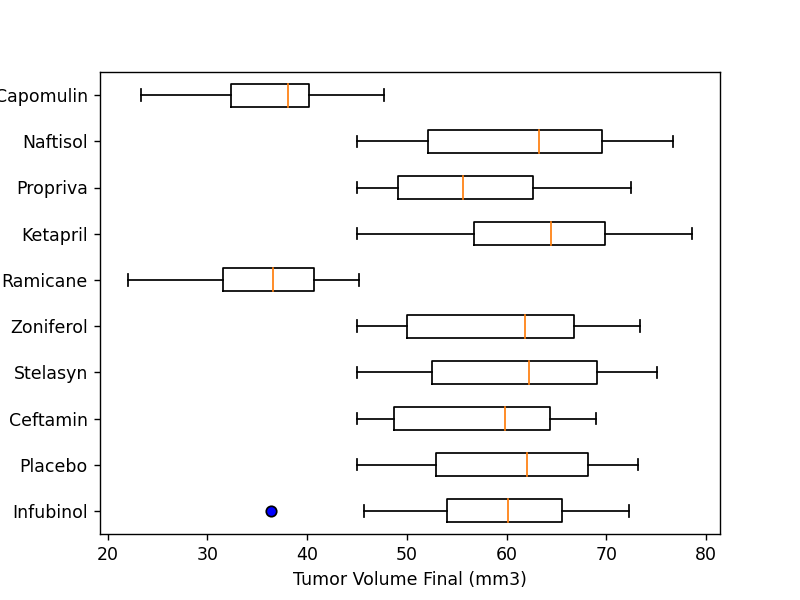

In [72]:
# Create a boxplot that visualizes the final tumor volume of all mice in the study across all drug regimens.

# Define a custom shape for all outliers in the visualization
blue_c = dict(markerfacecolor='b', marker='o')

# Create horizontal box and whisker plot
plt.boxplot(tumor_data, labels=drug_regimens_list, flierprops=blue_c, vert=False)
plt.xlabel('Tumor Volume Final (mm3)')
plt.show()